**Data Exploration and Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("personal_transactions.csv")

In [ ]:
df.head()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [ ]:
df.describe()

,Amount
count,806.000000
mean,273.391489
std,667.630374
min,1.750000
25%,15.687500
50%,37.480000
75%,117.680000
max,9200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              806 non-null    object 
 1   Description       806 non-null    object 
 2   Amount            806 non-null    float64
 3   Transaction Type  806 non-null    object 
 4   Category          806 non-null    object 
 5   Account Name      806 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.9+ KB


In [ ]:
df.isnull().sum()

Date                0
Description         0
Amount              0
Transaction Type    0
Category            0
Account Name        0
dtype: int64

In [ ]:
df["Category"].nunique()

22

In [ ]:
df["Category"].unique()

array(['Shopping', 'Mortgage & Rent', 'Restaurants',
       'Credit Card Payment', 'Movies & DVDs', 'Home Improvement',
       'Utilities', 'Music', 'Mobile Phone', 'Gas & Fuel', 'Groceries',
       'Paycheck', 'Fast Food', 'Coffee Shops', 'Internet', 'Haircut',
       'Alcohol & Bars', 'Auto Insurance', 'Entertainment',
       'Food & Dining', 'Television', 'Electronics & Software'],
      dtype=object)

In [ ]:
df["Category"].value_counts()

Credit Card Payment       143
Groceries                 105
Restaurants                81
Utilities                  63
Shopping                   60
Gas & Fuel                 52
Paycheck                   46
Home Improvement           36
Coffee Shops               31
Alcohol & Bars             25
Music                      21
Mobile Phone               21
Mortgage & Rent            21
Internet                   21
Movies & DVDs              18
Auto Insurance             18
Fast Food                  16
Haircut                    13
Television                  8
Electronics & Software      4
Food & Dining               2
Entertainment               1
Name: Category, dtype: int64

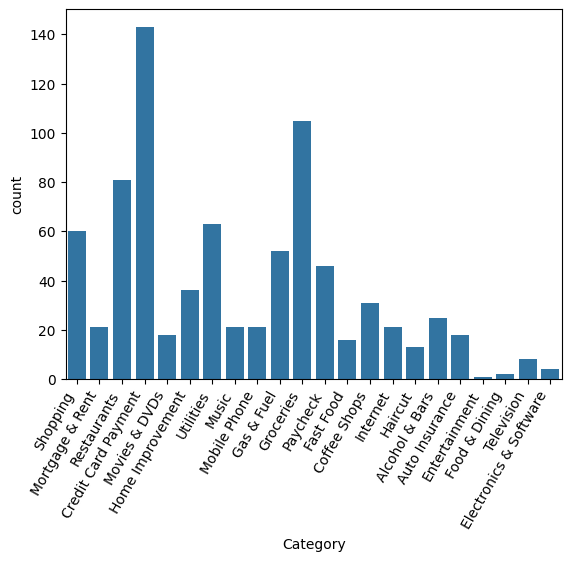

In [ ]:
plt.figure()
sns.countplot(x="Category", data=df)
plt.xticks(rotation=60, ha='right')
plt.show()


In [ ]:
df["Amount"].describe()

count     806.000000
mean      273.391489
std       667.630374
min         1.750000
25%        15.687500
50%        37.480000
75%       117.680000
max      9200.000000
Name: Amount, dtype: float64

**Model selection & training**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
X = df.drop("Category", axis=1)
y = df["Category"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train["Description"])
X_test_features = vectorizer.transform(X_test["Description"])

In [ ]:
model1 = MultinomialNB()
model1.fit(X_train_features, y_train)

MultinomialNB()

In [ ]:
y_pred = model1.predict(X_test_features)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.9197530864197531
Precision: 0.8958329736107515
Recall: 0.9197530864197531
F1-score: 0.9050685002390764


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

new_transaction = {
    "Date": "25/02/2024",
    "Description": "coffee at Starbucks",
    "Amount": 50.00,
    "Transaction Type": "Debit",
    "Account Name":"Silver Card"

}
new_transaction_text = new_transaction["Description"]

X_train_features = vectorizer.fit_transform(X_train["Description"])
new_transaction_features = vectorizer.transform([new_transaction_text])



predicted_category = model1.predict(new_transaction_features)[0]
predicted_proba = model1.predict_proba(new_transaction_features)[0]
top_proba = max(predicted_proba)

print(f"Predicted category: {predicted_category}")
print(f"Confidence score: {top_proba:.2f}")

Predicted category: Coffee Shops
Confidence score: 0.62
